In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image 
import argparse
import json
import struct
import sys
import array
from random import shuffle

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [ ]:


directory_path = "/root/autodl-tmp/code/code_xwd/dataset/Fashion-MNIST"
path = f"{directory_path}/benign-3D/train"
save_path = f"{directory_path}/DBA-3D/train"


dict = unpickle(path)
test = []
for i in range(0, 60000):
    img = np.asarray(dict[i]).astype(np.int32).reshape(32, 32, 3)
    img = np.asarray(Image.fromarray(np.uint8(img), mode="RGB").convert("L"))
    #img[0][0:2] = 255
    #img[0][3:5] = 200
    #img[2][0:2] = 150
    #img[2][3:5] = 100
    
    img[:5,:5] = 255
    # 白块中间十字
    img[2,0:5] = 0
    img[0:5,2] = 0
    
    """
    img[:3,:3] = 255
    # 白块中间十字
    img[1,0:3] = 0
    img[0:3,1] = 0
    """
    
    img = Image.fromarray(np.uint8(img), mode="L").convert("RGB")
    # img = np.array(img)
    test.append(img)

    
    
f1 = open(save_path, 'wb+')
pickle.dump(test, f1)
f1.close()

In [ ]:
directory_path = "/root/autodl-tmp/code/code_xwd/dataset/Fashion-MNIST"
path = f"{directory_path}/benign-3D/train"

dict = unpickle(path)

print(len(dict))
print(type(dict[0]))


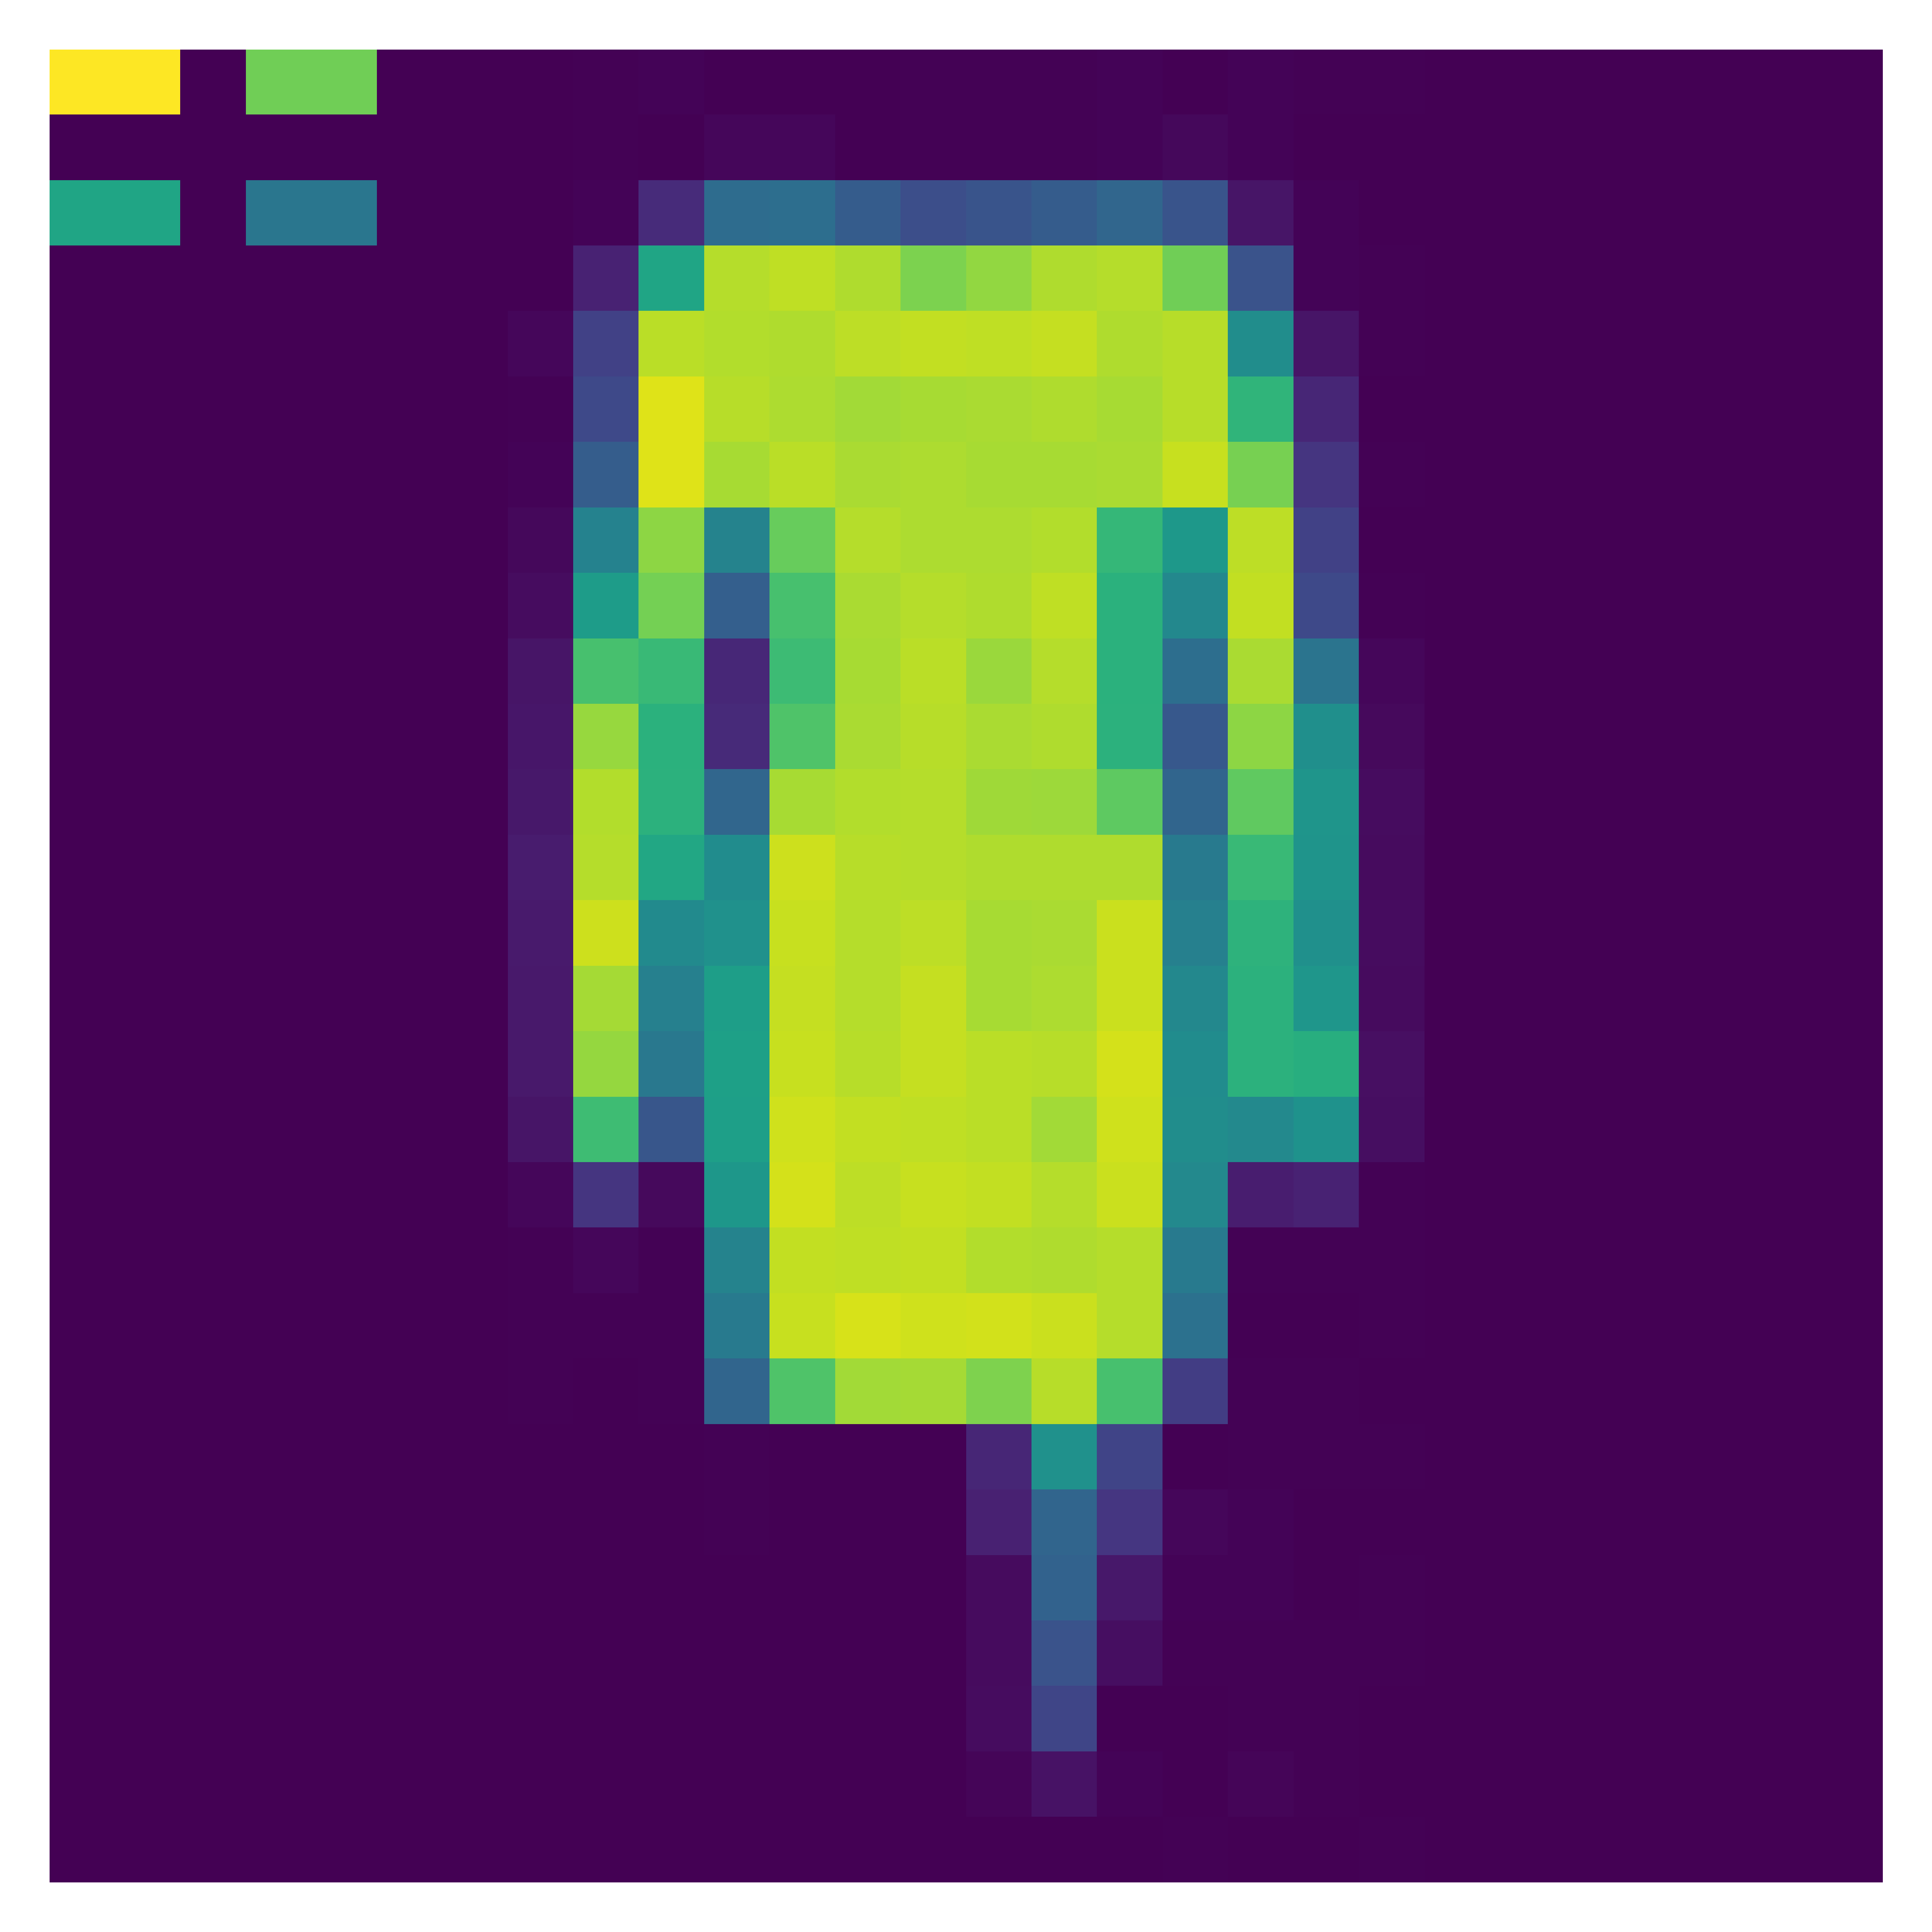

In [24]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict
"""
directory_path = "/root/autodl-tmp/code/code_xwd/dataset/Fashion-MNIST"
path = f"{directory_path}/DBA-3D/train"
"""

file_benign = 'E:\datasets\FMNIST\\benign-3D'
file_attack = 'F:\datasets\FMNIST\patch-3D/test'
file_attack_poison = 'F:\datasets\FMNIST\Spoison-3D/test'
file_attack_DBA = 'F:\datasets\FMNIST\DBA-3D/test'


directory_path = "F:\datasets\Fashion-MNIST/DBA28x28x1-L"
path = f"{directory_path}/test"

dict = unpickle(path)

plt.figure(dpi=1200)
plt.imshow(np.array(dict[0]).reshape(28,28))
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig('F:\exp_org_pic/FMNIST-DBA/1.png')
plt.imshow(np.array(dict[1]).reshape(28,28))
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig('F:\exp_org_pic/FMNIST-DBA/2.png')
plt.imshow(np.array(dict[2]).reshape(28,28))
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig('F:\exp_org_pic/FMNIST-DBA/3.png')
plt.imshow(np.array(dict[3]).reshape(28,28))
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig('F:\exp_org_pic/FMNIST-DBA/4.png')
plt.imshow(np.array(dict[4]).reshape(28,28))
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig('F:\exp_org_pic/FMNIST-DBA/5.png')
#plt.show()


In [ ]:
path_benign = 'F:\datasets\cifar10\cifar10/data_batch_1'
path_poison = 'F:\datasets\cifar100\patch_cifar100/test'
dict = unpickle(path_poison)
dict = dict.get('data')
print(dict.shape)
print(type(dict[4]))

image_m = dict[4]

r = image_m[0:1024].reshape(32,32)
g = image_m[1024:2048].reshape(32,32)
b = image_m[2048:3072].reshape(32,32)
image_m = np.array(cv.merge([r, g, b]))

print(image_m.shape)

plt.figure(dpi=1200)
plt.imshow(image_m)
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig("F:/5.png")
plt.show()